### Update a column of a csv file with random numbers between 150 to 180

In [15]:
import pandas as pd
import random

# Read data from CSV file
file_path = "company.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Generate random numbers between 150 and 180
random_numbers = [random.randint(150, 180) for _ in range(len(df))]

# Update the specified column with random numbers
column_name_to_update = "Height"  # Replace with the actual column name
df[column_name_to_update] = random_numbers

# Save the updated DataFrame back to the CSV file
df.to_csv(file_path, index=False)


### 1.How many are there in each Team and the percentage splitting with respect to the total employees.

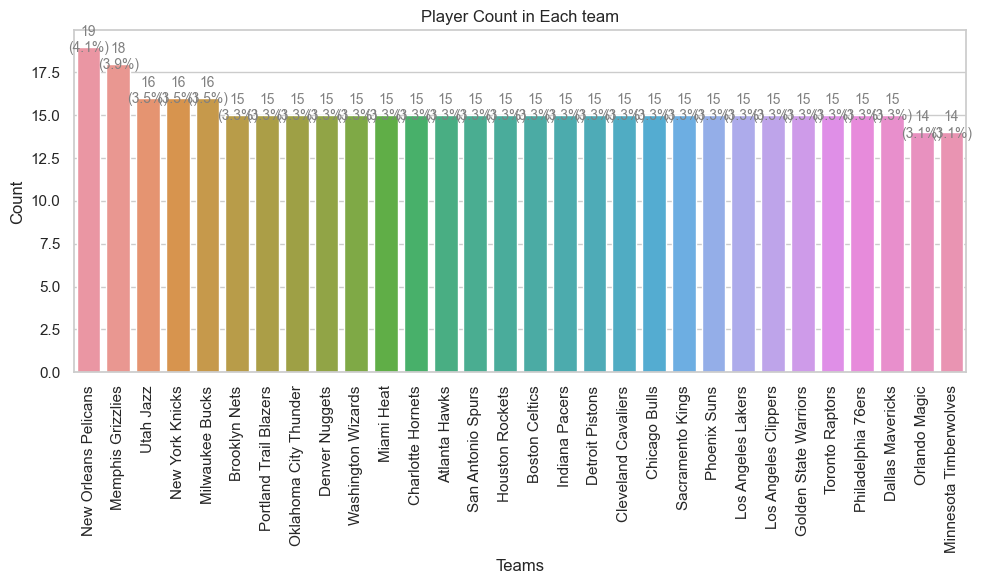

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('company.csv')
# Count the number of players in each team
team_counts = data['Team'].value_counts()


# Calculate percentages
total_players = len(data)
team_percentages = (team_counts / total_players) * 100

# Create a bar plot
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=team_counts.index, y=team_counts.values)


#Add count and percentage labels above each bar
# pathches to count number of bars

for i, p in enumerate(ax.patches):
    ax.annotate(f'{team_counts.values[i]}\n({team_percentages.values[i]:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('Player Count in Each team')
plt.tight_layout()
plt.show()

### 2.Segregate the employees count w.r.t different positions.

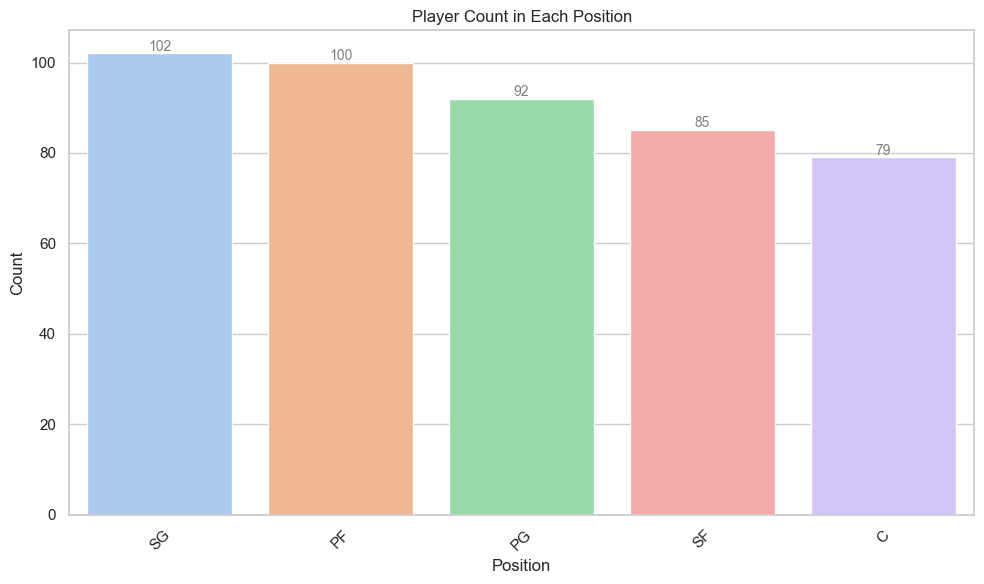

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('company.csv')

# Remove rows with NaN in the 'Position' column
data = data.dropna(subset=['Position'])

# Count the number of players in each position
position_counts = data['Position'].value_counts()

# Create a bar plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=position_counts.index, y=position_counts.values, palette='pastel')

# Add position labels above each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{position_counts.values[i]}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Player Count in Each Position')
plt.tight_layout()
plt.show()

### 2.Segregate the employees w.r.t different positions.

In [108]:
import pandas as pd
from tabulate import tabulate

# Read data from CSV file
file_path = "company.csv"
df = pd.read_csv(file_path)

# Group players by their positions and create a list of unique positions
unique_positions = df['Position'].unique()

# Create a table with each position followed by player names and a blank line
table_data = []
for idx, position in enumerate(unique_positions):
    players = ', '.join(df[df['Position'] == position]['Name'])
    table_data.append({'Position': position + ' -', 'Players': players})
    if idx != len(unique_positions) - 1:
        table_data.append({'Position': '', 'Players': ''})

# Display the table using tabulate
table_str = tabulate(table_data, headers='keys', tablefmt='plain')


print(table_str)

Position    Players
PG -        Avery Bradley, Terry Rozier, Marcus Smart, Isaiah Thomas, Jarrett Jack, Shane Larkin, Donald Sloan, Jose Calderon, Jerian Grant, Isaiah Canaan, Kendall Marshall, T.J. McConnell, Ish Smith, Cory Joseph, Kyle Lowry, Delon Wright, Stephen Curry, Shaun Livingston, Chris Paul, Pablo Prigioni, Austin Rivers, Jordan Clarkson, Marcelo Huertas, D'Angelo Russell, Eric Bledsoe, Brandon Knight, Phil Pressey, Ronnie Price, Darren Collison, Rajon Rondo, Aaron Brooks, Derrick Rose, Matthew Dellavedova, Kyrie Irving, Mo Williams, Steve Blake, Lorenzo Brown, Spencer Dinwiddie, Reggie Jackson, George Hill, Ty Lawson, Rodney Stuckey, Joe Young, Jerryd Bayless, Michael Carter-Williams, Tyler Ennis, Greivis Vasquez, J.J. Barea, Raymond Felton, Devin Harris, Deron Williams, Patrick Beverley, Andrew Goudelock, Mike Conley, Bryce Cotton, Jordan Farmar, Ray McCallum, Xavier Munford, Norris Cole, Toney Douglas, Tim Frazier, Jrue Holiday, Andre Miller, Patty Mills, Tony Parker, De

### 3.Find from which age group most of the employees belong to

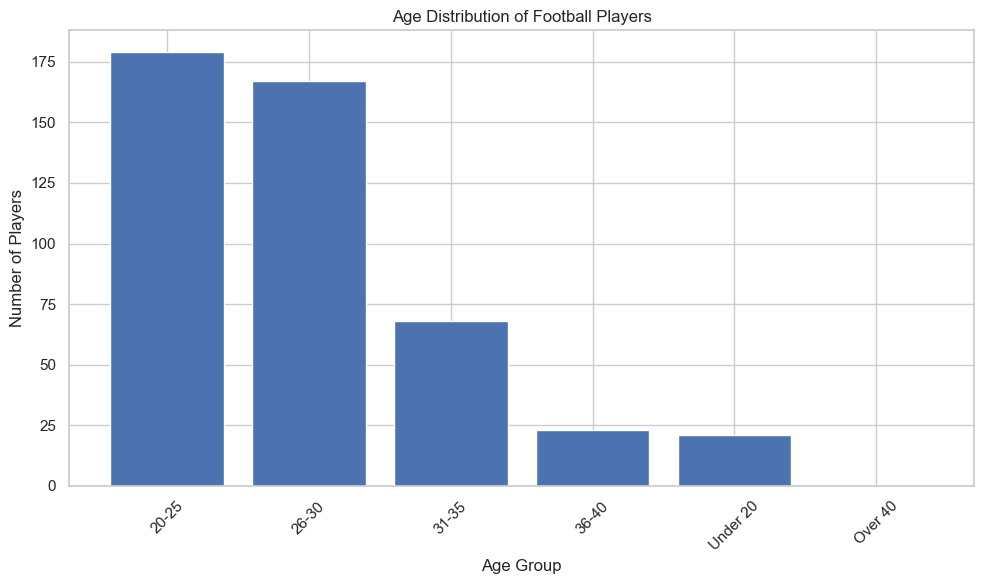

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
file_path = "company.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Define age group bins and labels
bins = [0, 20, 25, 30, 35, 40, float('inf')]
labels = ['Under 20', '20-25', '26-30', '31-35', '36-40', 'Over 40']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate the frequency of each age group
age_group_counts = df['AgeGroup'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Players')
plt.title('Age Distribution of Football Players')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### 4.Find out under which team and position, spending in terms of salary is high.

In [8]:
import seaborn as sns
import pandas as pd

# read a .csv file from  library
df = pd.read_csv("company.csv")
salary = df['Salary'].max()
max_salary_team = df.loc[df['Salary'].idxmax(), 'Team']
position = df.loc[df['Salary'].idxmax(), 'Position']
print(f"Team with Max Salary is : {max_salary_team} & Salary is {salary} & Position is: {position}")

Team with Max Salary is : Los Angeles Lakers & Salary is 25000000.0 & Position is: SF


### 5.Find if there is any correlation between age and salary , represent it visually.

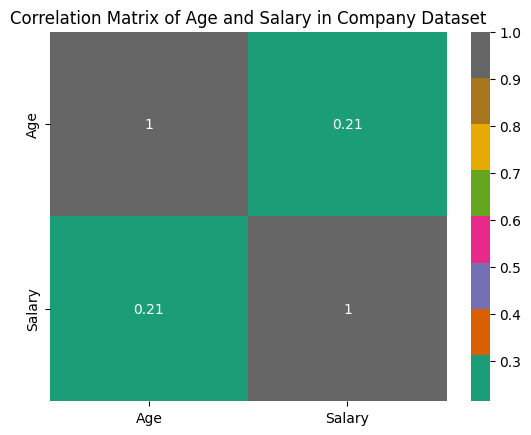

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Load dataset
company = pd.read_csv("company.csv")
# "drop" is used to drop "species" values from the dataset- only numerical vaues can be correlated
# List of column names to drop
columns_to_drop = ['Name','Team', 'Number', 'Position', 'Height','Weight', 'College']
df1=company.drop( columns = columns_to_drop )
# Compute correlation matrix
corr = df1.corr()
# Create heatmap
sns.heatmap(corr, annot=True, cmap="Dark2")
# Add title
plt.title("Correlation Matrix of Age and Salary in Company Dataset")
# Show plot
plt.show()